In [1]:
import pandas as pd
from scipy.stats import skew, kurtosis

# Load the dataset
data_auto_insurance = pd.read_csv('AutoInsurance.csv')

# Basic statistical description
basic_stats = data_auto_insurance.describe()

# Additional statistical moments: skewness and kurtosis
skewness = data_auto_insurance.select_dtypes(include=['float64', 'int64']).apply(lambda x: skew(x, nan_policy='omit'))
kurt = data_auto_insurance.select_dtypes(include=['float64', 'int64']).apply(lambda x: kurtosis(x, nan_policy='omit'))

# Correlation matrix for numerical columns
correlation_matrix = data_auto_insurance.select_dtypes(include=['float64', 'int64']).corr()

# Combine results into a summary DataFrame
statistical_summary = {
    'Mean': data_auto_insurance.mean(numeric_only=True),
    'Median': data_auto_insurance.median(numeric_only=True),
    'Std Dev': data_auto_insurance.std(numeric_only=True),
    'Skewness': skewness,
    'Kurtosis': kurt
}

stat_summary_df = pd.DataFrame(statistical_summary)

# Display results
print("Basic Statistical Description:")
print(basic_stats)

print("\nStatistical Summary (Mean, Median, Std Dev, Skewness, Kurtosis):")
print(stat_summary_df)

print("\nCorrelation Matrix:")
print(correlation_matrix)


Basic Statistical Description:
       Customer Lifetime Value        Income  Monthly Premium Auto  \
count              9134.000000   9134.000000           9134.000000   
mean               8004.940475  37657.380009             93.219291   
std                6870.967608  30379.904734             34.407967   
min                1898.007675      0.000000             61.000000   
25%                3994.251794      0.000000             68.000000   
50%                5780.182197  33889.500000             83.000000   
75%                8962.167041  62320.000000            109.000000   
max               83325.381190  99981.000000            298.000000   

       Months Since Last Claim  Months Since Policy Inception  \
count              9134.000000                    9134.000000   
mean                 15.097000                      48.064594   
std                  10.073257                      27.905991   
min                   0.000000                       0.000000   
25%          

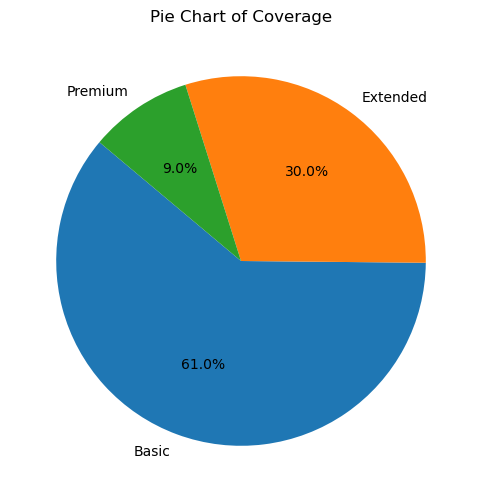

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np

# Plot 1: Pie Chart for Coverage Distribution
def plot_pie_chart(data, column):
    """
    Creates a pie chart for the distribution of categories in the specified column.

   
    """
    coverage_counts = data[column].value_counts()
    plt.figure(figsize=(8, 6))
    plt.pie(coverage_counts, labels=coverage_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(f"Pie Chart of {column}")
    plt.show()


# Generate the plots using the dataset
plot_pie_chart(data_auto_insurance, 'Coverage')  # Pie Chart for Coverage Distribution


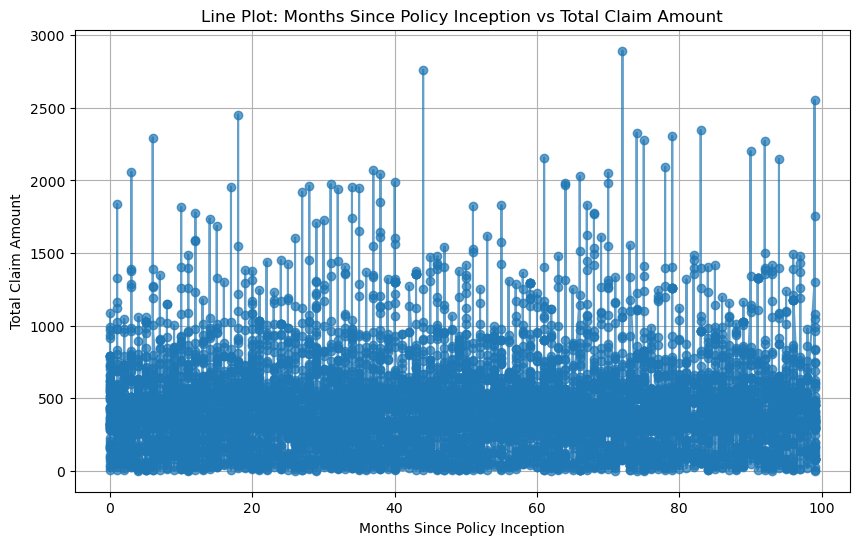

In [4]:
# Plot 2: Line Plot for Total Claim Amount over Months Since Policy Inception
def plot_line(data, x_col, y_col):
    """
    Creates a line plot to show trends between two columns in the dataset.

   
    """
    data_sorted = data.sort_values(by=x_col)
    plt.figure(figsize=(10, 6))
    plt.plot(data_sorted[x_col], data_sorted[y_col], marker='o', linestyle='-', alpha=0.7)
    plt.title(f"Line Plot: {x_col} vs {y_col}")
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.grid(True)
    plt.show()
plot_line(data_auto_insurance, 'Months Since Policy Inception', 'Total Claim Amount')

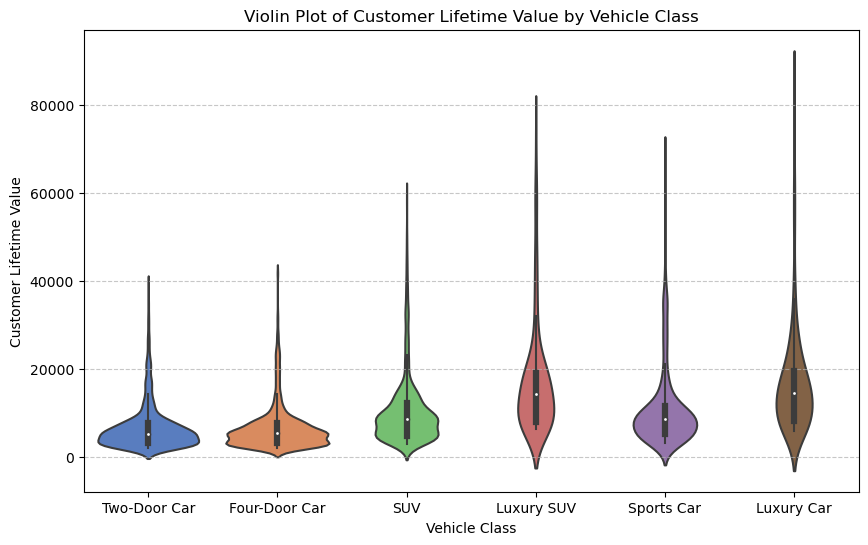

In [5]:
# Plot 3: Violin Plot for Customer Lifetime Value by Vehicle Class
def plot_violin(data, x_col, y_col):
    """
    Creates a violin plot to visualize the distribution of a numeric variable grouped by a categorical variable.

    """
    plt.figure(figsize=(10, 6))
    sns.violinplot(x=data[x_col], y=data[y_col], palette="muted")
    plt.title(f"Violin Plot of {y_col} by {x_col}")
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
plot_violin(data_auto_insurance, 'Vehicle Class', 'Customer Lifetime Value')

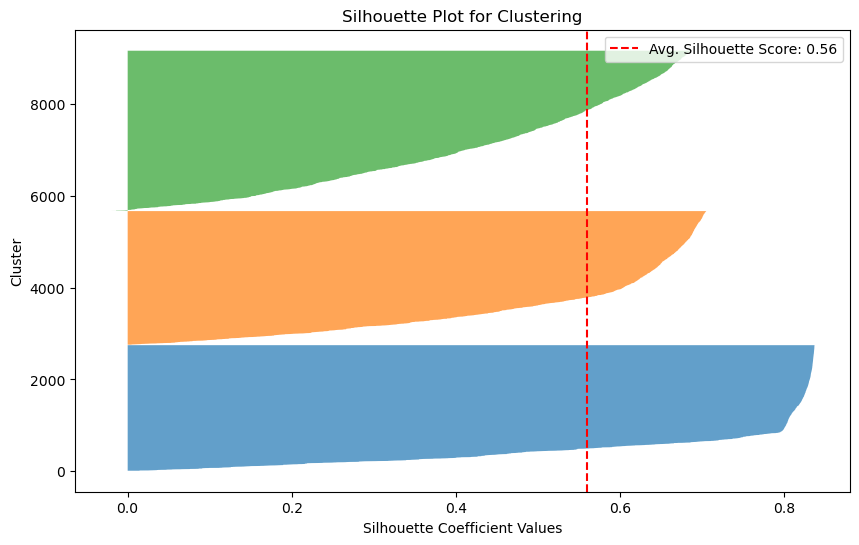

In [6]:
# Plot 4: Silhouette Plot for Clustering
def plot_silhouette(data, n_clusters):
    """
    Creates a silhouette plot to visualize the quality of clustering.

   
    """
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(data)
    silhouette_avg = silhouette_score(data, cluster_labels)
    sample_silhouette_values = silhouette_samples(data, cluster_labels)

    plt.figure(figsize=(10, 6))
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette.sort()
        size_cluster = ith_cluster_silhouette.shape[0]
        y_upper = y_lower + size_cluster

        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette, alpha=0.7)
        y_lower = y_upper + 10

    plt.axvline(x=silhouette_avg, color="red", linestyle="--", label=f"Avg. Silhouette Score: {silhouette_avg:.2f}")
    plt.title("Silhouette Plot for Clustering")
    plt.xlabel("Silhouette Coefficient Values")
    plt.ylabel("Cluster")
    plt.legend()
    plt.show()
plot_silhouette(data_auto_insurance[['Customer Lifetime Value', 'Income', 'Total Claim Amount']], n_clusters=3)

C:\Users\kisho\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


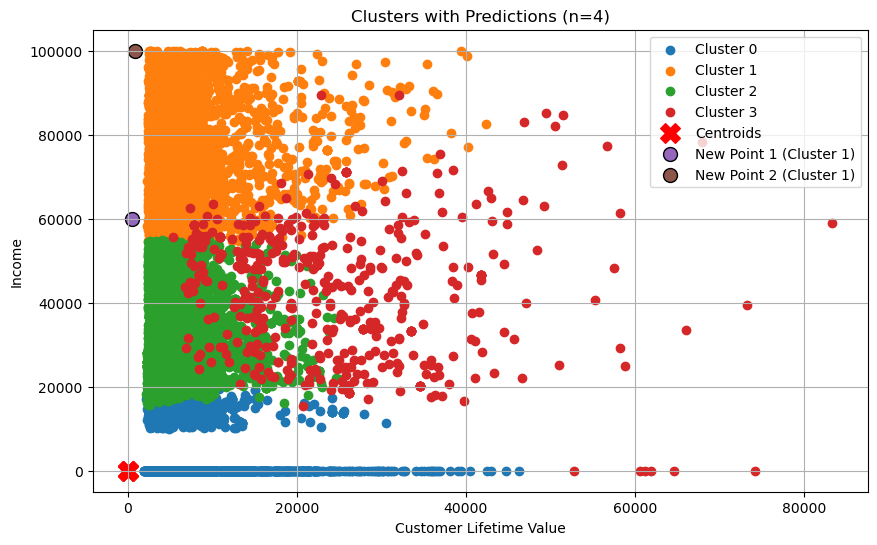

Silhouette Score for 4 clusters: 0.46
Predicted clusters for new points: [1 1]


In [7]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Function for clustering with normalization, back-scaling, and predictions
def perform_clustering_with_predictions(data, n_clusters, new_points):
    """
    Performs k-means clustering on normalized data and predicts clusters for new data points.

   
    """
    # Normalize the data
    scaler = MinMaxScaler()
    normalized_data = scaler.fit_transform(data)
    
    # Perform k-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(normalized_data)
    
    # Back-scale data for presentation
    clustered_data = pd.DataFrame(scaler.inverse_transform(normalized_data), columns=data.columns)
    clustered_data['Cluster'] = labels
    
    # Predict clusters for new data points
    normalized_new_points = scaler.transform(new_points)
    predicted_labels = kmeans.predict(normalized_new_points)
    back_scaled_points = scaler.inverse_transform(normalized_new_points)
    
    # Plot the clusters and predictions
    plt.figure(figsize=(10, 6))
    for cluster in range(n_clusters):
        cluster_points = clustered_data[clustered_data['Cluster'] == cluster]
        plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], label=f"Cluster {cluster}")
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
    
    # Plot new points with predictions
    for i, point in enumerate(back_scaled_points):
        plt.scatter(point[0], point[1], label=f"New Point {i+1} (Cluster {predicted_labels[i]})", edgecolor='k', s=100)
    
    plt.title(f"Clusters with Predictions (n={n_clusters})")
    plt.xlabel(data.columns[0])
    plt.ylabel(data.columns[1])
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Display silhouette score
    silhouette_avg = silhouette_score(normalized_data, labels)
    print(f"Silhouette Score for {n_clusters} clusters: {silhouette_avg:.2f}")
    
    return clustered_data, predicted_labels

# Example new points for predictions
new_points_clustering = np.array([[500, 60000, 200], [800, 100000, 150]])

# Perform clustering with predictions
clustered_data, predicted_clusters = perform_clustering_with_predictions(
    data_auto_insurance[['Customer Lifetime Value', 'Income', 'Total Claim Amount']], 
    n_clusters=4, 
    new_points=new_points_clustering
)

print("Predicted clusters for new points:", predicted_clusters)


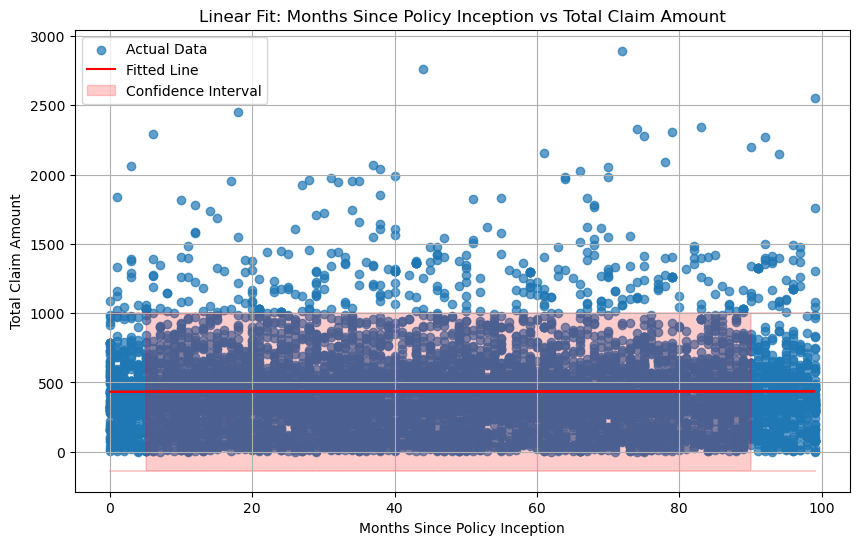

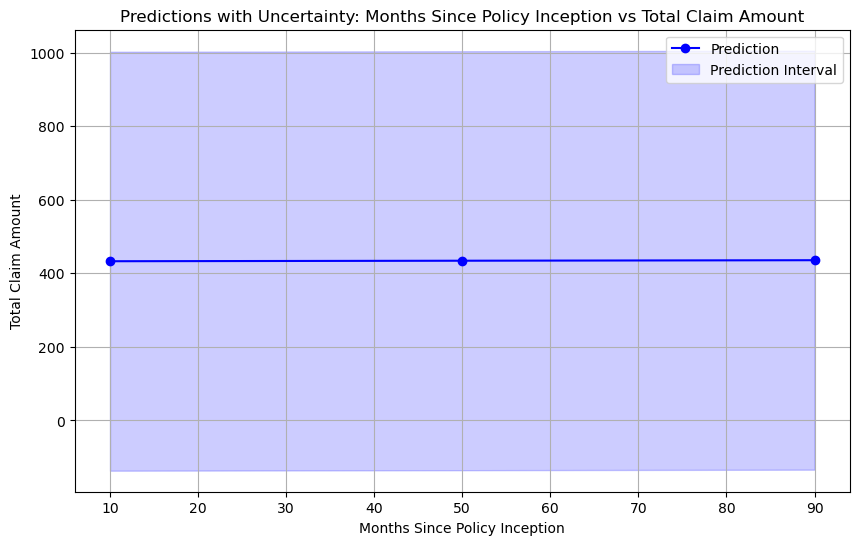

Fitting predictions for new points:
   New Points   Predicted    Lower CI     Upper CI
0          10  432.767332 -136.578513  1002.113177
1          50  434.155984 -135.189860  1003.501829
2          90  435.544637 -133.801208  1004.890482


In [8]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Function for fitting with predictions, confidence intervals, and error bars
def perform_fitting_with_predictions(data, x_col, y_col, new_points):
    """
    Fits a linear regression model, generates predictions for new data points,
    and plots results with confidence intervals and error bars.

   .
    """
    x = data[[x_col]].values
    y = data[y_col].values

    # Fit linear regression model
    model = LinearRegression()
    model.fit(x, y)
    y_pred = model.predict(x)

    # Generate confidence intervals
    residuals = y - y_pred
    std_error = np.std(residuals)
    conf_interval = 1.96 * std_error  # 95% confidence interval

    # Plot data, fitted line, and error bars
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, label='Actual Data', alpha=0.7)
    plt.plot(x, y_pred, color='red', label='Fitted Line')
    plt.fill_between(x.flatten(), (y_pred - conf_interval), (y_pred + conf_interval), color='red', alpha=0.2, label='Confidence Interval')
    plt.title(f"Linear Fit: {x_col} vs {y_col}")
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.legend()
    plt.grid(True)
    plt.show()

    # Predictions for new points
    new_y_pred = model.predict(new_points)
    new_y_upper = new_y_pred + conf_interval
    new_y_lower = new_y_pred - conf_interval

    # Plot predictions with uncertainties
    plt.figure(figsize=(10, 6))
    plt.plot(new_points, new_y_pred, label='Prediction', color='blue', marker='o')
    plt.fill_between(new_points.flatten(), new_y_lower, new_y_upper, color='blue', alpha=0.2, label='Prediction Interval')
    plt.title(f"Predictions with Uncertainty: {x_col} vs {y_col}")
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.legend()
    plt.grid(True)
    plt.show()

    # Return results as DataFrame
    return pd.DataFrame({'New Points': new_points.flatten(), 'Predicted': new_y_pred, 'Lower CI': new_y_lower, 'Upper CI': new_y_upper})

# Example new points for fitting predictions
new_points_fitting = np.array([[10], [50], [90]])

# Perform fitting with predictions
fitting_results = perform_fitting_with_predictions(
    data_auto_insurance, x_col='Months Since Policy Inception', y_col='Total Claim Amount', new_points=new_points_fitting
)

print("Fitting predictions for new points:")
print(fitting_results)
